<a href="https://colab.research.google.com/github/ProfAndersonPereira/atividade26abril2025/blob/main/lib_pd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data=pd.read_csv("/content/mymoviedb.csv",lineterminator='\n')

### Patusco, como algumas das suas perguntas podiam ser respondidas pela mesma função eu as agrupei numa mesma célula para evitar de ficar repetindo o mesmo código várias vezes.

In [10]:
# Quais as colunas do Dataset? Qual o tipo de variável de cada coluna?
'''
Release_Date   object
Title   object
Overview   object
Popularity   float64
Vote_Count   int64
Vote_Average   float64
Original_Language   object
Genre   object
Poster_Url   object
'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [11]:
# Qual tamanho do DataSet? Quantas linhas?
'''9827 linhas e 9 colunas'''

data.shape

(9827, 9)

In [13]:
# Qual o filme com maior número de votaçôes?
'''Inception'''

data[['Title', 'Vote_Count','Vote_Average']].sort_values('Vote_Count', ascending=False).head(1)

,Title,Vote_Count,Vote_Average
380,Inception,31077,8.4


In [ ]:
# Qual filme teve a maior nota (critério de desempate é o filme com mais votos)
'''
Levando em consideração apenas a média dos votos, a resposta seria Kung Fu Master Huo Yuanjia
No entanto, se considerarmos a quantidade de votantes, o filme com maior nota seria o Inception. Como o Kung Fu Master só teve um único voto, o valor da sua média se tornou inflado.
Conlclui que o Franco Escamailla é o filme com a maior nota por meio do produto da quantidade de votos pela média dos votos, ou seja, o inverso do que se faz para obter o valor da média.
'''
print(data[data['Title'].isin(['Inception','Kung Fu Master Huo Yuanjia'])][['Title', 'Vote_Count', 'Vote_Average']].sort_values(['Vote_Average'], ascending=[False]).head())

data['Magnitude_dos_Votos']=data['Vote_Count']*data['Vote_Average']
print("\n")
print(data[data['Title'].isin(['Inception','Kung Fu Master Huo Yuanjia'])][['Title', 'Magnitude_dos_Votos']].sort_values(['Magnitude_dos_Votos'], ascending=[False]).head())



                           Title  Vote_Count  Vote_Average
9391  Kung Fu Master Huo Yuanjia           1          10.0
380                    Inception       31077           8.4


                           Title  Magnitude_dos_Votos
380                    Inception             261046.8
9391  Kung Fu Master Huo Yuanjia                 10.0


In [14]:
#Existem dados duplicados?
'''Não'''

data.duplicated().any()


np.False_

In [ ]:
# Existem valores nulos? Qual a quantidade e a proporção em relação ao total de dados?
'''Não existem valores nulose e a proporção é 0%'''

print(data.isnull().any())
print("\n")
print(data.isnull().any().any())

Release_Date           False
Title                  False
Overview               False
Popularity             False
Vote_Count             False
Vote_Average           False
Original_Language      False
Genre                  False
Poster_Url             False
Magnitude_dos_Votos    False
dtype: bool


False


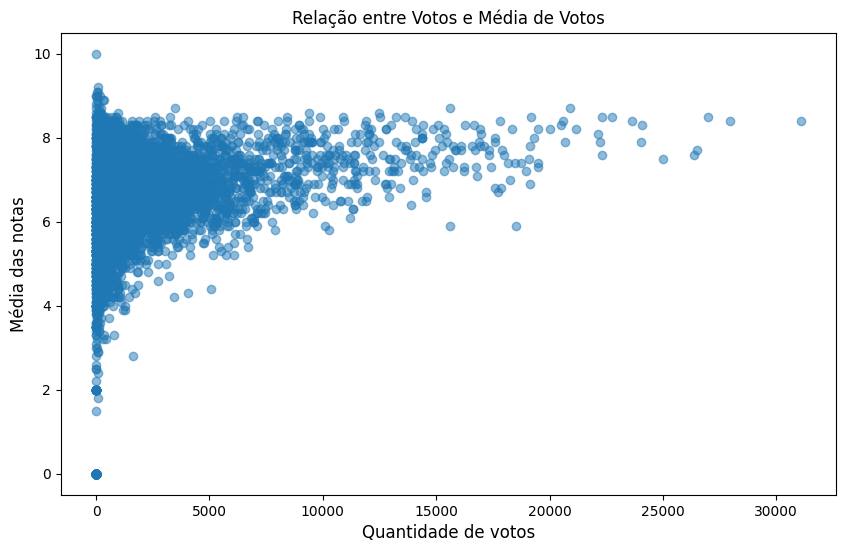

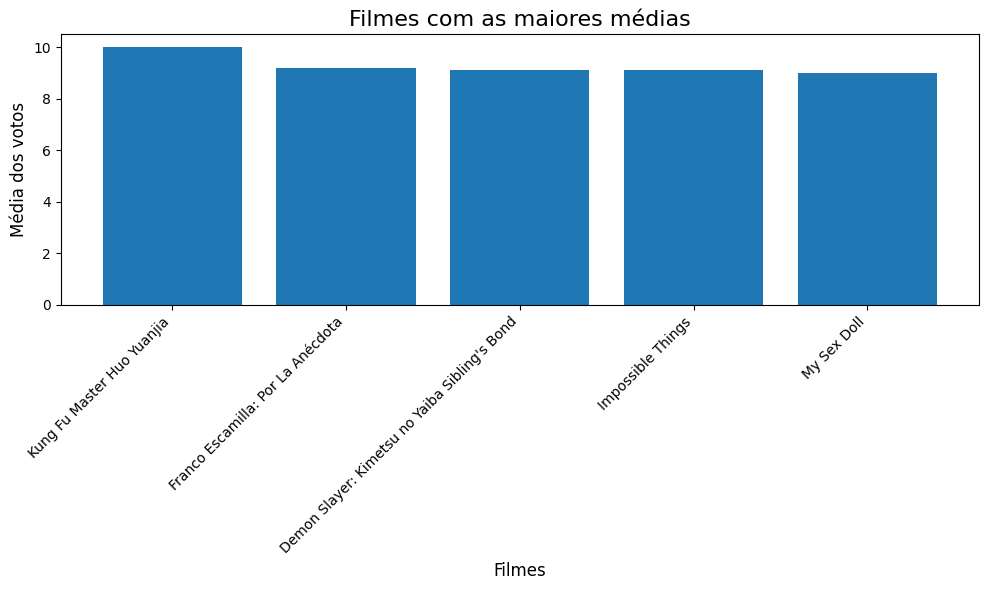

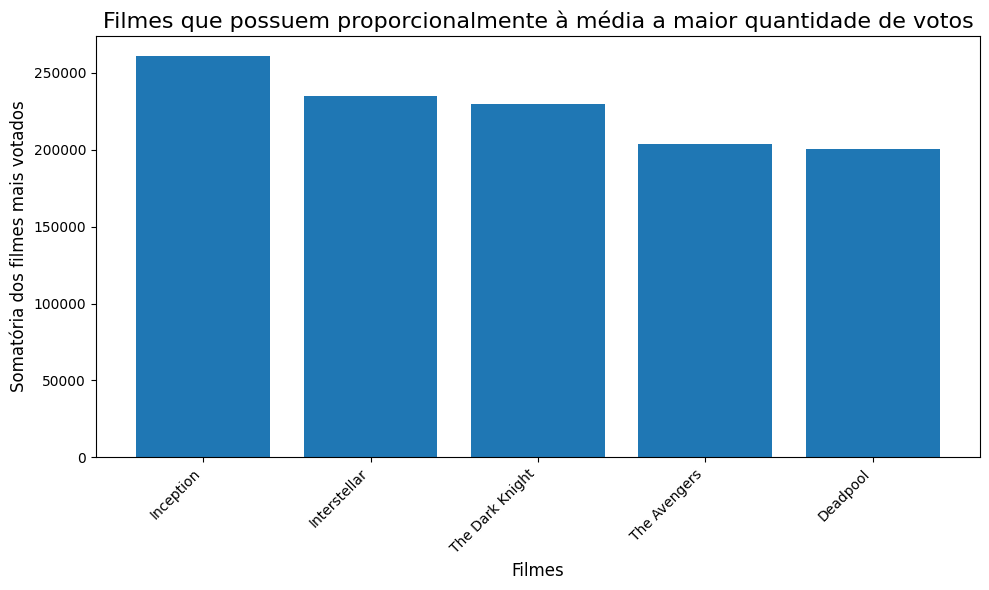

In [ ]:
#Quais insights é possivel obter desses dados? Gere gráficos
'''
A maioria das avaliações conta com menos de 1000 votos, o que pode indicar que a comparação dos filmes por meio de sua média não seja uma boa métrica. Quanto menor for a quantidade de votantes em um filme, mais inflado o valor da sua média será. Quanto mais votantes, mais representativo esse valor será para a maioria das pessoas.
Logo, é possível concluir que os filmes com as maiores médias não são necessariamente os melhores filmes para a maioria das pessoas, mas sim os são os melhores para uma parcela pequena (ou ínfima, já que há médias que contam com apenas uma única votação) da população.
'''
plt.figure(figsize=(10, 6))
plt.plot(data['Vote_Count'], data['Vote_Average'], 'o', alpha=0.5)
plt.title('Relação entre Votos e Média de Votos')
plt.xlabel('Quantidade de votos', fontsize=12)
plt.ylabel('Média das notas', fontsize=12)
plt.show()

'''Não à toa que a classificação dos filmes com as maiores médias não bate com a lista dos filmes que possuem proporcionalmente a maior somatória de votos'''

maiores_medias = data[['Title', 'Vote_Average']].sort_values('Vote_Average', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(maiores_medias['Title'], maiores_medias['Vote_Average'])

plt.title('Filmes com as maiores médias', fontsize=16)
plt.xlabel('Filmes', fontsize=12)
plt.ylabel('Média dos votos', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

mais_votos = data[['Title', 'Magnitude_dos_Votos']].sort_values('Magnitude_dos_Votos', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(mais_votos['Title'], mais_votos['Magnitude_dos_Votos'])

plt.title('Filmes que possuem proporcionalmente à média a maior quantidade de votos', fontsize=16)
plt.xlabel('Filmes', fontsize=12)
plt.ylabel('Somatória dos filmes mais votados', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()